<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Bioseñales y Sistemas </center></font></h1>
<h2><font color='0B5345'> <center>
Practica 3  </center></font></h2>
<h3><font color='0B5345'> <center>
Diego Andrés Flórez - Daniel Soto </center></font></h3>
<font  face="Courier New" size="3">
<p1><center> </center></p1>



<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>

In [3]:
import scipy

import matplotlib.pyplot as plt


data=scipy.io.loadmat('/content/signals.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data['ECG_asRecording'].shape

(1, 30720)



*   Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal. El valor RMS se define en forma discreta con N número de muestras



In [5]:
import numpy as np

def calcular_RMS(signals):
    # Número de muestras en la señal
    N = len(signals)

    # Calcula el cuadrado de cada elemento en la señal
    squared_values = np.square(signals)

    # Calcula la suma de los valores cuadrados y multiplica por 1/N
    sum_squared = np.sum(squared_values) / N

    # Calcula la raíz cuadrada del resultado
    rms = np.sqrt(sum_squared)

    return rms

# Ejemplo de uso:
rms_value = calcular_RMS(data['ECG_asRecording'])
print("El valor cuadrático medio (RMS) de la señal es:", rms_value)

El valor cuadrático medio (RMS) de la señal es: 769960.9052452312




*   A  partir  de  la  información  suministrada  en  el archivo.mat,  determine  el  tiempo  de  duración  de las señales, cree un vector de tiempo.



In [6]:
# Frecuencia de muestreo
Fs = data['Fs'][0, 0]

# Duración de las señales en segundos
duracion_ECG = len(data['ECG_asRecording']) / Fs
duracion_EMG1 = len(data['EMG_asRecording1']) / Fs
duracion_EMG2 = len(data['EMG_asRecording2']) / Fs

# Crear vectores de tiempo
tiempo_ECG = np.linspace(0, duracion_ECG, len(data['ECG_asRecording']))
tiempo_EMG1 = np.linspace(0, duracion_EMG1, len(data['EMG_asRecording1']))
tiempo_EMG2 = np.linspace(0, duracion_EMG2, len(data['EMG_asRecording2']))

print("Duración de la señal ECG:", duracion_ECG, "segundos")
print("Duración de la señal EMG1:", duracion_EMG1, "segundos")
print("Duración de la señal EMG2:", duracion_EMG2, "segundos")

Duración de la señal ECG: 0.0009765625 segundos
Duración de la señal EMG1: 0.0009765625 segundos
Duración de la señal EMG2: 0.0009765625 segundos


* Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.

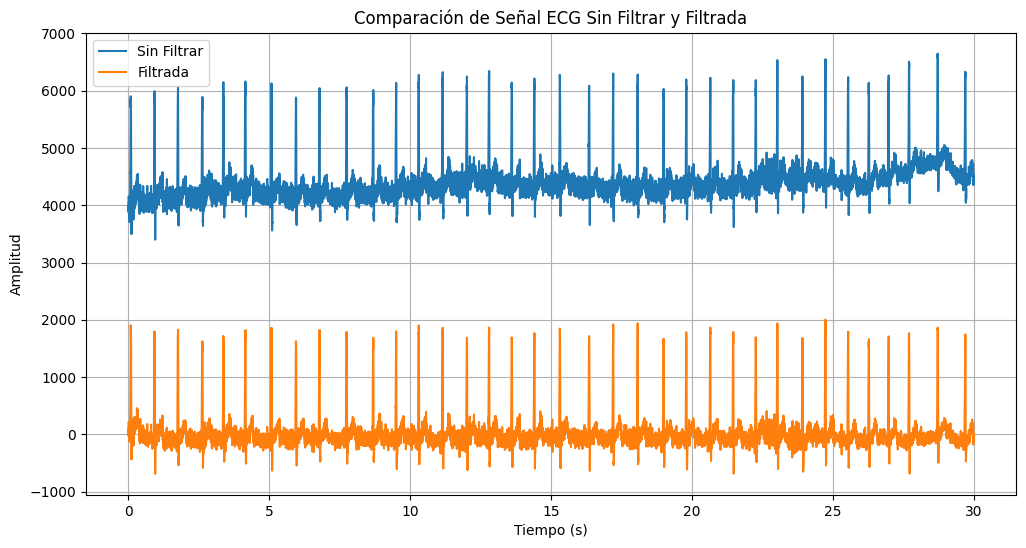

In [7]:
# Obtener los datos de la señal sin filtrar y filtrada
ECG_unfiltered = data['ECG_asRecording'].flatten()
ECG_filtered = data['ECG_filtered'].flatten()

# Obtener la frecuencia de muestreo
Fs = data['Fs'][0, 0]

# Crear vector de tiempo para la señal sin filtrar
t_unfiltered = np.arange(0, len(ECG_unfiltered) / Fs, 1 / Fs)

# Crear vector de tiempo para la señal filtrada
t_filtered = np.arange(0, len(ECG_filtered) / Fs, 1 / Fs)

# Graficar la señal sin filtrar y filtrada
plt.figure(figsize=(12, 6))
plt.plot(t_unfiltered, ECG_unfiltered, label='Sin Filtrar')
plt.plot(t_filtered, ECG_filtered, label='Filtrada')
plt.title('Comparación de Señal ECG Sin Filtrar y Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

El comportamiento de ambas señales difiere en la amplitud ya que en la señal sin filtrar las amplitudes son mucho más grandes que en la señal dfiltrada tanto para picos positivos como negativos,además se puede evidenciar que la señal sin filtrar presenta un offset aproximadamente de unos 4000mv, aspecto que la señal filtrada ya no se presenta. En un ECG la información más relevante se da entre 0.5Hz y 40Hz ya que corresponden a las ondas P, complejo QRS y T, sin embargo, las frecuencias de un ECG van desde 0.05-150Hz, usar frecuencias fuera de este rango pueden generar ruido en la señal. El filtro que se puede usar para eliminar el offset de la señal es un "baseline winder removal" ya que este se encarga de eliminar cualquier desplazamiento de la señal que no sea generado por la actividad electrica del corazón. El comportamiento de la señal filtrada comparada con la original, teniendo en cuenta los picos negativos y positivos da idea de que se empleó un filtro pasa banda ya que pasan tanto picos positivos como negativos, este en determinado rango de frecuencia deseado.




* Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.

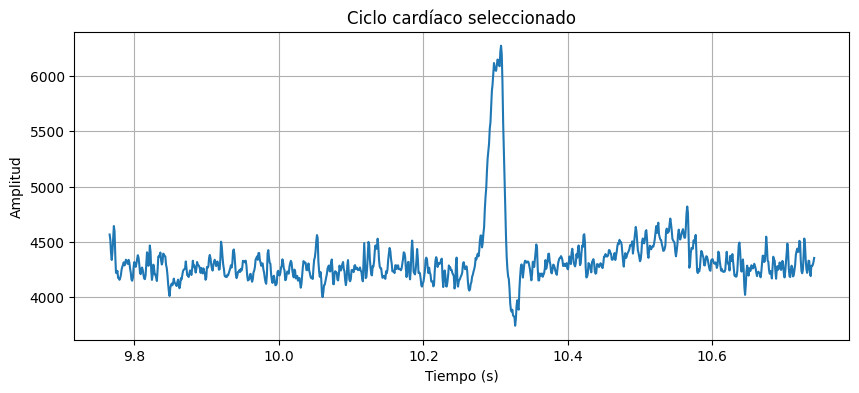

Métricas del ciclo cardíaco:
Promedio: 4337.098315673828
Valor RMS: 4346.290246859522
Varianza: 79817.11012544797
Desviación estándar: 282.51922080709477


In [8]:
# Obtener la señal ECG sin filtrar
ECG_raw = np.squeeze(data['ECG_asRecording'])

# Crear vector de tiempo para la señal ECG
Fs = data['Fs'][0, 0]
tiempo = np.arange(0, len(ECG_raw) / Fs, 1/Fs)

# Supongamos que queremos seleccionar un ciclo cardíaco entre los índices 10000 y 11000
indice_inicio = 10000
indice_fin = 11000

# Seleccionar el ciclo cardíaco
ciclo_cardiaco = ECG_raw[indice_inicio:indice_fin]
tiempo_ciclo = tiempo[indice_inicio:indice_fin]

# Graficar el ciclo cardíaco seleccionado
plt.figure(figsize=(10, 4))
plt.plot(tiempo_ciclo, ciclo_cardiaco)
plt.title('Ciclo cardíaco seleccionado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Calcular métricas del ciclo cardíaco seleccionado
promedio = np.mean(ciclo_cardiaco)
rms = np.sqrt((1/len(ciclo_cardiaco)) * np.sum(np.square(ciclo_cardiaco)))
varianza = np.var(ciclo_cardiaco)
desviacion_estandar = np.std(ciclo_cardiaco)

# Imprimir los resultados
print("Métricas del ciclo cardíaco:")
print("Promedio:", promedio)
print("Valor RMS:", rms)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion_estandar)

Al analizar estos resultados, podemos observar que tanto el promedio como el valor RMS son valores muy similares en este caso, lo que indica que la señal es relativamente estable en términos de amplitud durante el ciclo cardíaco seleccionado. La varianza y la desviación estándar son relativamente altas en comparación con el promedio, lo que sugiere que hay una variabilidad significativa en las amplitudes de la señal durante el ciclo. Esto puede ser indicativo de la naturaleza dinámica y cambiante de la actividad cardíaca, donde las amplitudes de la señal pueden variar considerablemente.

* Tome  la  señal  filtrada.  Repita el  procedimiento  anterior con  esta  señal, compare  con  los  resultados obtenidos en el ítem anterior.

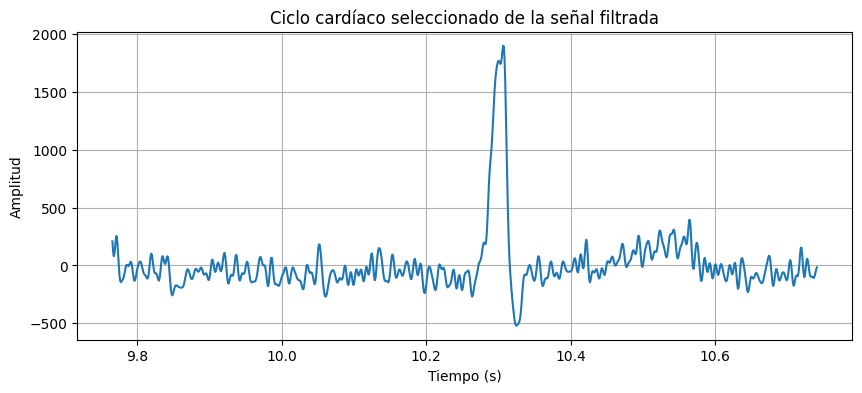

Métricas del ciclo cardíaco (señal filtrada):
Promedio: 4.201570714904338
Valor RMS: 277.6802422569527
Varianza: 77088.6637434076
Desviación estándar: 277.64845352244913


In [9]:
# Obtener la señal ECG filtrada
ECG_filtrado = np.squeeze(data['ECG_filtered'])

# Crear vector de tiempo para la señal ECG
Fs = data['Fs'][0, 0]
tiempo = np.arange(0, len(ECG_filtrado) / Fs, 1/Fs)

# Supongamos que queremos seleccionar un ciclo cardíaco entre los índices 10000 y 11000
indice_inicio = 10000
indice_fin = 11000

# Seleccionar el ciclo cardíaco
ciclo_cardiaco_filtrado = ECG_filtrado[indice_inicio:indice_fin]
tiempo_ciclo = tiempo[indice_inicio:indice_fin]

# Graficar el ciclo cardíaco seleccionado de la señal filtrada
plt.figure(figsize=(10, 4))
plt.plot(tiempo_ciclo, ciclo_cardiaco_filtrado)
plt.title('Ciclo cardíaco seleccionado de la señal filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Calcular métricas del ciclo cardíaco seleccionado de la señal filtrada
promedio_filtrado = np.mean(ciclo_cardiaco_filtrado)
rms_filtrado = np.sqrt((1/len(ciclo_cardiaco_filtrado)) * np.sum(np.square(ciclo_cardiaco_filtrado)))
varianza_filtrado = np.var(ciclo_cardiaco_filtrado)
desviacion_estandar_filtrado = np.std(ciclo_cardiaco_filtrado)

# Imprimir los resultados
print("Métricas del ciclo cardíaco (señal filtrada):")
print("Promedio:", promedio_filtrado)
print("Valor RMS:", rms_filtrado)
print("Varianza:", varianza_filtrado)
print("Desviación estándar:", desviacion_estandar_filtrado)

In [11]:
#COMPARACIÓN
# Imprimir los resultados de la señal sin filtrar
print("Resultados de la señal sin filtrar:")
print("Promedio:", promedio)
print("Valor RMS:", rms)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion_estandar)
print()

# Imprimir los resultados de la señal filtrada
print("Resultados de la señal filtrada:")
print("Promedio:", promedio_filtrado)
print("Valor RMS:", rms_filtrado)
print("Varianza:", varianza_filtrado)
print("Desviación estándar:", desviacion_estandar_filtrado)

Resultados de la señal sin filtrar:
Promedio: 4337.098315673828
Valor RMS: 4346.290246859522
Varianza: 79817.11012544797
Desviación estándar: 282.51922080709477

Resultados de la señal filtrada:
Promedio: 4.201570714904338
Valor RMS: 277.6802422569527
Varianza: 77088.6637434076
Desviación estándar: 277.64845352244913


Comparando los resultados de la señal sin filtrar y la señal filtrada, podemos observar las siguientes diferencias significativas:

Promedio:

* Señal sin filtrar: 4337.098315673828
* Señal filtrada: 4.201570714904338

El promedio de la señal sin filtrar es mucho mayor que el promedio de la señal filtrada. Esto sugiere que la señal original tiene una componente de corriente continua (DC) mucho mayor que la señal filtrada. El proceso de filtrado ha eliminado esta componente DC, resultando en un promedio mucho más bajo en la señal filtrada.

Valor RMS:

* Señal sin filtrar: 4346.290246859522
* Señal filtrada: 277.6802422569527

El valor RMS de la señal sin filtrar es mucho mayor que el valor RMS de la señal filtrada. Esto indica que la señal original tiene una mayor amplitud promedio en comparación con la señal filtrada, lo que puede deberse a la presencia de artefactos o ruido de baja frecuencia que han sido atenuados por el filtro.

Varianza:

* Señal sin filtrar: 79817.11012544797
* Señal filtrada: 77088.6637434076

La varianza de la señal sin filtrar es ligeramente mayor que la varianza de la señal filtrada. Esto puede deberse a la presencia de componentes de baja frecuencia en la señal original que han sido eliminados por el filtro, lo que reduce la variabilidad en la señal filtrada.

Desviación estándar:

* Señal sin filtrar: 282.51922080709477
* Señal filtrada: 277.64845352244913

La desviación estándar de la señal sin filtrar es ligeramente mayor que la desviación estándar de la señal filtrada. Esto es consistente con las diferencias observadas en el valor RMS, ya que la desviación estándar es la raíz cuadrada de la varianza y está relacionada con la amplitud promedio de la señal.

Los resultados muestran claramente el efecto del filtrado en la señal, donde se reduce significativamente la componente de corriente continua (DC) y se atenúan los artefactos o ruido de baja frecuencia. Esto resulta en una señal filtrada con una amplitud promedio mucho más baja y una variabilidad reducida en comparación con la señal original sin filtrar.

* Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafiquecada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria?

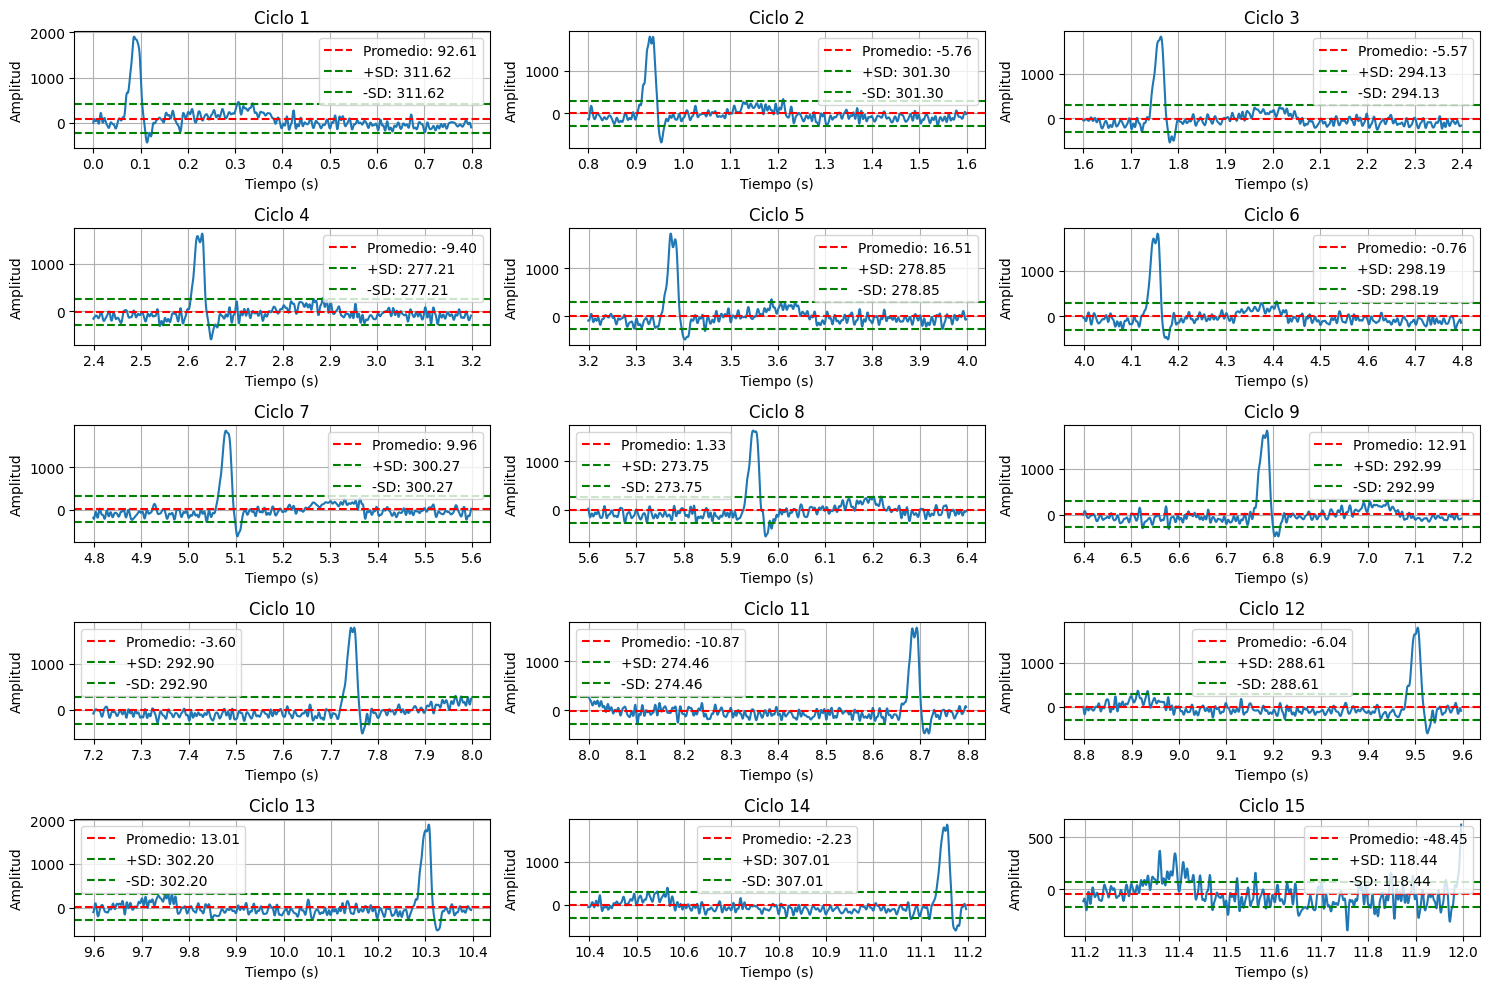

Estadísticas de los valores promedio de los ciclos:
Promedio: 3.58
Varianza: 784.55

Estadísticas de las varianzas de los ciclos:
Promedio: 80859.50
Varianza: 363193764.47


In [12]:
# Obtener la señal ECG filtrada
ECG_filtrado = np.squeeze(data['ECG_filtered'])

# Crear vector de tiempo para la señal ECG
Fs = data['Fs'][0, 0]
tiempo = np.arange(0, len(ECG_filtrado) / Fs, 1/Fs)

# Definir la duración aproximada de un ciclo cardíaco (en segundos)
duracion_ciclo = 0.8  # Ajusta este valor según la frecuencia cardíaca

# Calcular el número total de muestras por ciclo
muestras_por_ciclo = int(duracion_ciclo * Fs)

# Extraer 15 ciclos de la señal filtrada
ciclos = []
for i in range(15):
    indice_inicio = i * muestras_por_ciclo
    indice_fin = (i + 1) * muestras_por_ciclo
    ciclo = ECG_filtrado[indice_inicio:indice_fin]
    ciclos.append(ciclo)

# Calcular el valor promedio y la varianza para cada ciclo
valores_promedio = [np.mean(ciclo) for ciclo in ciclos]
varianzas = [np.var(ciclo) for ciclo in ciclos]

# Graficar cada ciclo y mostrar el valor promedio y la varianza
plt.figure(figsize=(15, 10))
for i, ciclo in enumerate(ciclos):
    plt.subplot(5, 3, i+1)
    plt.plot(tiempo[i*muestras_por_ciclo:(i+1)*muestras_por_ciclo], ciclo)
    plt.title(f'Ciclo {i+1}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.tight_layout()
    plt.axhline(valores_promedio[i], color='r', linestyle='--', label=f'Promedio: {valores_promedio[i]:.2f}')
    plt.axhline(valores_promedio[i] + np.sqrt(varianzas[i]), color='g', linestyle='--', label=f'+SD: {np.sqrt(varianzas[i]):.2f}')
    plt.axhline(valores_promedio[i] - np.sqrt(varianzas[i]), color='g', linestyle='--', label=f'-SD: {np.sqrt(varianzas[i]):.2f}')
    plt.legend()

plt.show()

# Analizar estadísticamente
# Calcular el promedio y la varianza de los valores promedio y varianzas
promedio_valores_promedio = np.mean(valores_promedio)
varianza_valores_promedio = np.var(valores_promedio)
promedio_varianzas = np.mean(varianzas)
varianza_varianzas = np.var(varianzas)

print("Estadísticas de los valores promedio de los ciclos:")
print(f"Promedio: {promedio_valores_promedio:.2f}")
print(f"Varianza: {varianza_valores_promedio:.2f}")
print()
print("Estadísticas de las varianzas de los ciclos:")
print(f"Promedio: {promedio_varianzas:.2f}")
print(f"Varianza: {varianza_varianzas:.2f}")

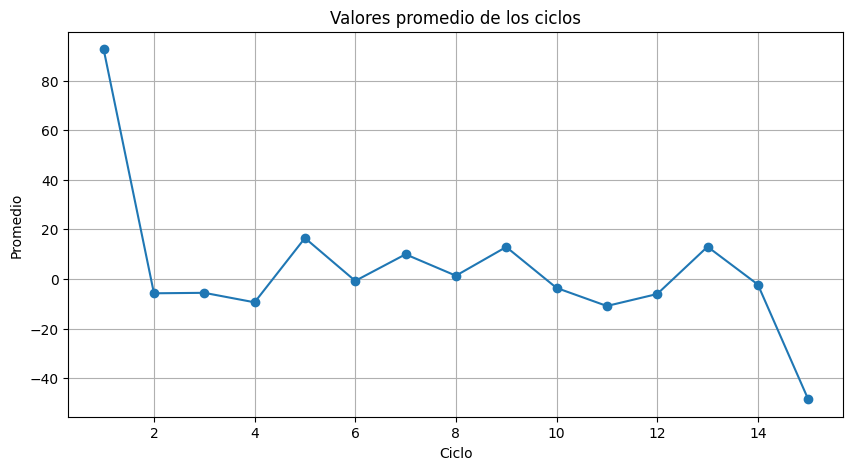

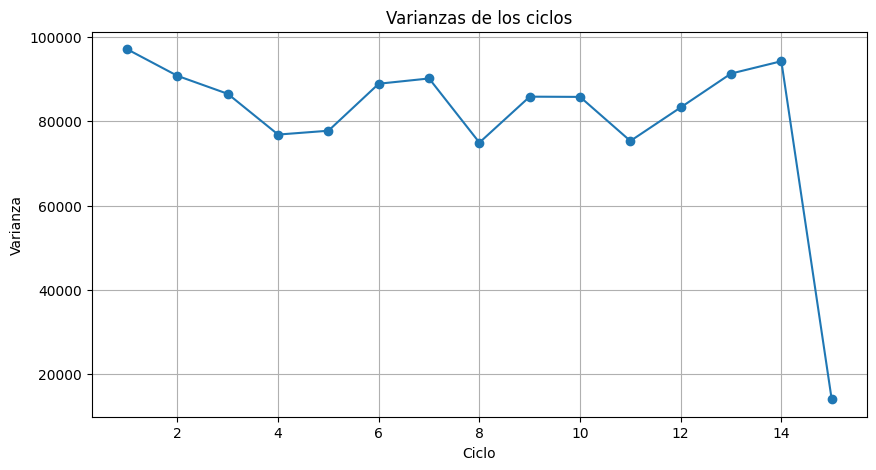

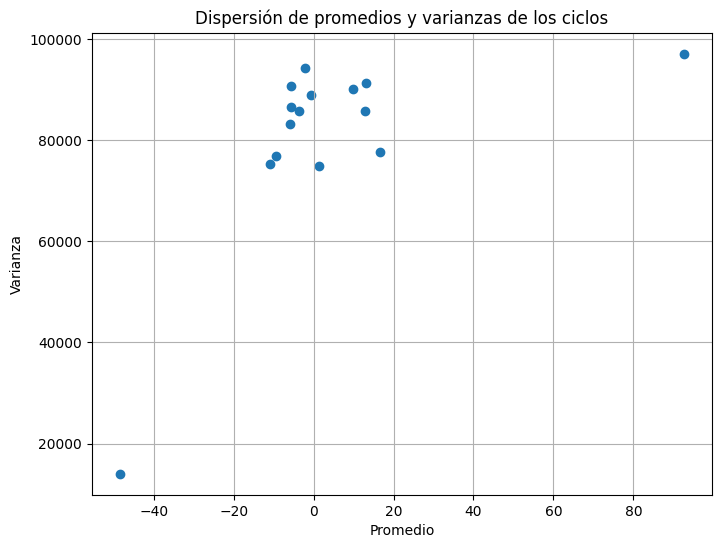

In [13]:
#ANÁLISIS
# Obtener la señal ECG filtrada
ECG_filtrado = np.squeeze(data['ECG_filtered'])

# Crear vector de tiempo para la señal ECG
Fs = data['Fs'][0, 0]
tiempo = np.arange(0, len(ECG_filtrado) / Fs, 1/Fs)

# Supongamos que cada ciclo cardíaco tiene una duración aproximada de 0.8 segundos
duracion_ciclo = 0.8
muestras_por_ciclo = int(duracion_ciclo * Fs)

# Extraer 15 ciclos de la señal filtrada y calcular promedio y varianza para cada ciclo
promedios = []
varianzas = []

for i in range(15):
    inicio = i * muestras_por_ciclo
    fin = (i + 1) * muestras_por_ciclo
    ciclo = ECG_filtrado[inicio:fin]

    # Calcular promedio y varianza del ciclo
    promedio_ciclo = np.mean(ciclo)
    varianza_ciclo = np.var(ciclo)

    # Guardar promedio y varianza
    promedios.append(promedio_ciclo)
    varianzas.append(varianza_ciclo)

# Gráfico de los valores promedio de los ciclos
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 16), promedios, marker='o', linestyle='-')
plt.title('Valores promedio de los ciclos')
plt.xlabel('Ciclo')
plt.ylabel('Promedio')
plt.grid(True)
plt.show()

# Gráfico de las varianzas de los ciclos
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 16), varianzas, marker='o', linestyle='-')
plt.title('Varianzas de los ciclos')
plt.xlabel('Ciclo')
plt.ylabel('Varianza')
plt.grid(True)
plt.show()

# Gráfico de dispersión de los valores promedio y las varianzas
plt.figure(figsize=(8, 6))
plt.scatter(promedios, varianzas)
plt.title('Dispersión de promedios y varianzas de los ciclos')
plt.xlabel('Promedio')
plt.ylabel('Varianza')
plt.grid(True)
plt.show()


Teniendo en cuenta las estadisticas de los valores promedio y de las varianzas de los ciclos, la varianza de las varianzas de los ciclos es bastante grande en comparación con el promedio de las varianzas. Esto sugiere una gran variabilidad en las varianzas de los ciclos, lo que puede indicar que la señal no es completamente estacionaria. Además, los valores promedio no son relativamente constantes a lo largo del tiempo, y hay se presentan algunas fluctuaciones grandes entre los ciclos.

La estacionariedad de una señal implica que sus características estadísticas, como el promedio y la varianza, no cambian significativamente a lo largo del tiempo. Dada la gran variabilidad en las varianzas de los ciclos, es poco probable que la señal sea completamente estacionaria.
Ademmás, al tratarse de una bioseñal esta no es estacionaria, ya que en un  momento  dado  puede  presentar  unos  valores,  y  por cambios en el ambiente, el sujeto de quien se adquiere el ECG puede alterar su fisiología y esto cambiar la señal  ECG.

* Realice  dos  veces  comparaciones  entre  dos  ciclos  cualquiera  utilizando  una  prueba  t. Determine estadísticamente si existe diferencia estadística entre los ciclos, Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para  determinar  si  existen  diferencias  entre  los  ciclos.  Qué  indica  este  análisis  respecto  de  la estacionariedad, explique. De no cumplirse los requisitos, realice entonces un análisis no paramétrico (prueba U de Mann-Whitney)

In [14]:
from scipy import stats

# Seleccionar dos ciclos para comparar
ciclo1 = ciclos[0]
ciclo2 = ciclos[1]

# Verificar normalidad de la variable
statistic1, p_value1 = stats.normaltest(ciclo1)
statistic2, p_value2 = stats.normaltest(ciclo2)

print("Prueba de normalidad para ciclo 1: p-valor =", p_value1)
print("Prueba de normalidad para ciclo 2: p-valor =", p_value2)

# Verificar homocedasticidad (usando prueba de Levene)
statistic_levene, p_value_levene = stats.levene(ciclo1, ciclo2)

print("Prueba de homocedasticidad (Levene): p-valor =", p_value_levene)

# Realizar prueba t si se cumplen los supuestos
if p_value1 > 0.05 and p_value2 > 0.05 and p_value_levene > 0.05:
    t_statistic, p_value_t = stats.ttest_ind(ciclo1, ciclo2)
    print("Prueba t: p-valor =", p_value_t)
    if p_value_t < 0.05:
        print("Existe diferencia estadística entre los ciclos (según la prueba t)")
    else:
        print("No existe diferencia estadística entre los ciclos (según la prueba t)")
else:
    # Realizar prueba U de Mann-Whitney si no se cumplen los supuestos
    u_statistic, p_value_u = stats.mannwhitneyu(ciclo1, ciclo2)
    print("Prueba U de Mann-Whitney: p-valor =", p_value_u)
    if p_value_u < 0.05:
        print("Existe diferencia estadística entre los ciclos (según la prueba U de Mann-Whitney)")
    else:
        print("No existe diferencia estadística entre los ciclos (según la prueba U de Mann-Whitney)")


Prueba de normalidad para ciclo 1: p-valor = 6.247639482505214e-146
Prueba de normalidad para ciclo 2: p-valor = 1.6534832698972513e-152
Prueba de homocedasticidad (Levene): p-valor = 0.1374495696057109
Prueba U de Mann-Whitney: p-valor = 3.6580005331004923e-38
Existe diferencia estadística entre los ciclos (según la prueba U de Mann-Whitney)


Se ha encontrado evidencia estadística de que hay diferencias significativas en la distribución de los datos entre dos grupos o ciclos.

Al obtener un resultado significativo en la prueba U de Mann-Whitney, se concluye que las distribuciones de los datos en los dos grupos son diferentes, lo que sugiere que hay una diferencia significativa entre los dos grupos en términos de la variable medida.

* Compruebe   los   resultados   anteriores   aplicando   una   prueba   de   Dickey-Fuller   a   la   señal (Estacionariedad).

In [15]:
from statsmodels.tsa.stattools import adfuller

# Aplicar la prueba de Dickey-Fuller a la señal
resultado_adf = adfuller(ECG_filtrado)

# Imprimir los resultados
print('Estadística ADF:', resultado_adf[0])
print('Valor p:', resultado_adf[1])
print('Valores críticos:')
for key, value in resultado_adf[4].items():
    print(f'\t{key}: {value}')

# Interpretar los resultados
if resultado_adf[1] < 0.05:
    print("La serie temporal es estacionaria (según la prueba de Dickey-Fuller)")
else:
    print("La serie temporal no es estacionaria (según la prueba de Dickey-Fuller)")

Estadística ADF: -0.6546593807809804
Valor p: 0.8581469379838581
Valores críticos:
	1%: -3.430563031267381
	5%: -2.8616341541406003
	10%: -2.5668201153621077
La serie temporal no es estacionaria (según la prueba de Dickey-Fuller)


Como el valor p obtenido en la prueba de Dickey-Fuller es mayor que 0.05, entonces no hay suficiente evidencia para rechazar la hipótesis nula de que la serie temporal es no estacionaria. En otras palabras, no se puede concluir que la serie temporal es estacionaria según los resultados de la prueba de Dickey-Fuller si el valor p es mayor que 0.05.

La no estacionariedad de las bioseñales de ECG significa que sus características, como la forma de onda, la frecuencia cardíaca y la amplitud, pueden cambiar con el tiempo y en diferentes condiciones fisiológicas. Por lo tanto, el análisis de bioseñales generalmente se realiza considerando su naturaleza no estacionaria y puede requerir técnicas avanzadas de procesamiento de señales y análisis de series temporales para capturar y caracterizar estas variaciones.

# Conclusiones de la práctica
* Nuestras observaciones indican que el filtrado de la señal ECG puede tener un impacto significativo en las características de la señal, como la amplitud promedio del ciclo cardíaco.
* La aplicación de pruebas estadísticas como la prueba U de Mann-Whitney nos permite identificar diferencias significativas entre los grupos o ciclos analizados. Estas conclusiones resaltan la importancia de considerar cuidadosamente el procesamiento de la señal y el análisis estadístico al interpretar los datos en estudios de señales biomédicas.
* Las bioseñales como el electrocardiograma (ECG), generalmente no se consideran estacionarias debido a su naturaleza dinámica y cambiante. Las bioseñales, incluido el ECG, representan la actividad fisiológica del cuerpo humano, que está sujeta a variaciones temporales causadas por factores como la respiración, el movimiento, la actividad muscular, el estado emocional y otros procesos biológicos.